# Preprocessing module of BAMT

<p> Before passing data to any BN learning stage, user should clean data.
    It can be done with prepocessing module. <p>

In [1]:
!pip install bamt==0.1.202

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%%time
import bamt.Preprocessors as pp

import pandas as pd
import numpy as np
from sklearn import preprocessing

CPU times: user 685 ms, sys: 795 ms, total: 1.48 s
Wall time: 604 ms


## Load  data into memory

*NB: Other dataset to experiment with can be found in Data folder.*

In [3]:
hack = pd.read_csv(r'../data/hack_processed_with_rf.csv')

In [4]:
hack.sample(10)

Field name            Reservoir unit    Country         Region  \
333             OROCUAL                  CARAPITA  VENEZUELA  LATIN AMERICA   
214              JOFFRE                    VIKING     CANADA  NORTH AMERICA   
55                BERYL                    NANSEN         UK         EUROPE   
6                  ALBA                      ALBA         UK         EUROPE   
118                DEFA                 WAHA-DEFA      LIBYA         AFRICA   
345             PENWELL                SAN ANDRES        USA  NORTH AMERICA   
501            YOWLUMNE                   STEVENS        USA  NORTH AMERICA   
308  MOXA ARCH-LA BARGE  FRONTIER (TIP TOP FIELD)        USA  NORTH AMERICA   
221  JUMPING POUND WEST             TURNER VALLEY     CANADA  NORTH AMERICA   
269        LOST SOLDIER                  TENSLEEP        USA  NORTH AMERICA   

              Basin name Tectonic regime  Latitude  Longitude  \
333    EASTERN VENEZUELA     COMPRESSION    9.8667   -63.3333   
214       WESTERN CANADA     COMPRESSION   52.2830  -113.5543   
55    NORTH SEA NORTHERN       EXTENSION   59.5498     1.5318   
6      NORTH SEA CENTRAL             NaN   58.0692     1.0784   
118                 SIRT       EXTENSION   28.0781    19.9150   
345              PERMIAN     COMPRESSION   31.7333  -102.5625   
501          SAN JOAQUIN     COMPRESSION   35.0461  -119.1904   
308  GREATER GREEN RIVER     COMPRESSION   41.6119  -110.2000   
221       WESTERN CANADA     COMPRESSION   51.1952  -114.8046   
269  GREATER GREEN RIVER             NaN   42.2392  -107.5587   

                   Operator company Onshore/offshore  ...  \
333                           PDVSA          ONSHORE  ...   
214                 VIKOR RESOURCES          ONSHORE  ...   
55                       EXXONMOBIL         OFFSHORE  ...   
6                           CHEVRON         OFFSHORE  ...   
118                            LNOC          ONSHORE  ...   
345  CHEVRON /CONOCOPHILLIPS /TOTAL          ONSHORE  ...   
501           CASTLE PEAK RESOURCES          ONSHORE  ...   
308                        NUMEROUS          ONSHORE  ...   
221                   SHELL /ENCANA          ONSHORE  ...   
269                    MERIT ENERGY          ONSHORE  ...   

                   Period                Lithology  Gross  Netpay Porosity  \
333               NEOGENE                SANDSTONE   90.0    48.0     13.0   
214            CRETACEOUS                SANDSTONE   34.5     3.0     13.2   
55               JURASSIC                SANDSTONE   54.0    43.2     18.0   
6               PALEOGENE  THINLY-BEDDED SANDSTONE   90.0    81.0      NaN   
118  CRETACEOUS-PALEOGENE                LIMESTONE  258.0    63.0     20.0   
345               PERMIAN                 DOLOMITE  120.0    35.4     11.0   
501               NEOGENE  THINLY-BEDDED SANDSTONE   60.0    45.0     20.0   
308            CRETACEOUS                SANDSTONE  330.0    27.0     13.0   
221         CARBONIFEROUS                 DOLOMITE  240.0    35.4      6.3   
269         CARBONIFEROUS                SANDSTONE  180.0    63.0      NaN   

    Permeability  Oil density  Oil recovery factor  \
333         35.0   849.849850                0.340   
214        190.0   825.072886                0.440   
55         200.0   839.762611                  NaN   
6         3500.0   933.993399                0.360   
118         20.0   854.984894                0.310   
345          3.0   829.912023                0.400   
501         75.0   865.443425                0.400   
308          0.1   766.937669                  NaN   
221          3.2          NaN                  NaN   
269         31.0   849.849850                0.542   

     Condensate recovery factor  Gas recovery factor  
333                         NaN                  NaN  
214                         NaN                  NaN  
55                          NaN                  NaN  
6                           NaN                  NaN  
118                       

In [5]:
hack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Field name                  514 non-null    object 
 1   Reservoir unit              514 non-null    object 
 2   Country                     514 non-null    object 
 3   Region                      514 non-null    object 
 4   Basin name                  514 non-null    object 
 5   Tectonic regime             442 non-null    object 
 6   Latitude                    514 non-null    float64
 7   Longitude                   514 non-null    float64
 8   Operator company            514 non-null    object 
 9   Onshore/offshore            514 non-null    object 
 10  Hydrocarbon type            514 non-null    object 
 11  Reservoir status            514 non-null    object 
 12  Structural setting          514 non-null    object 
 13  Depth                       514 non

<AxesSubplot:>

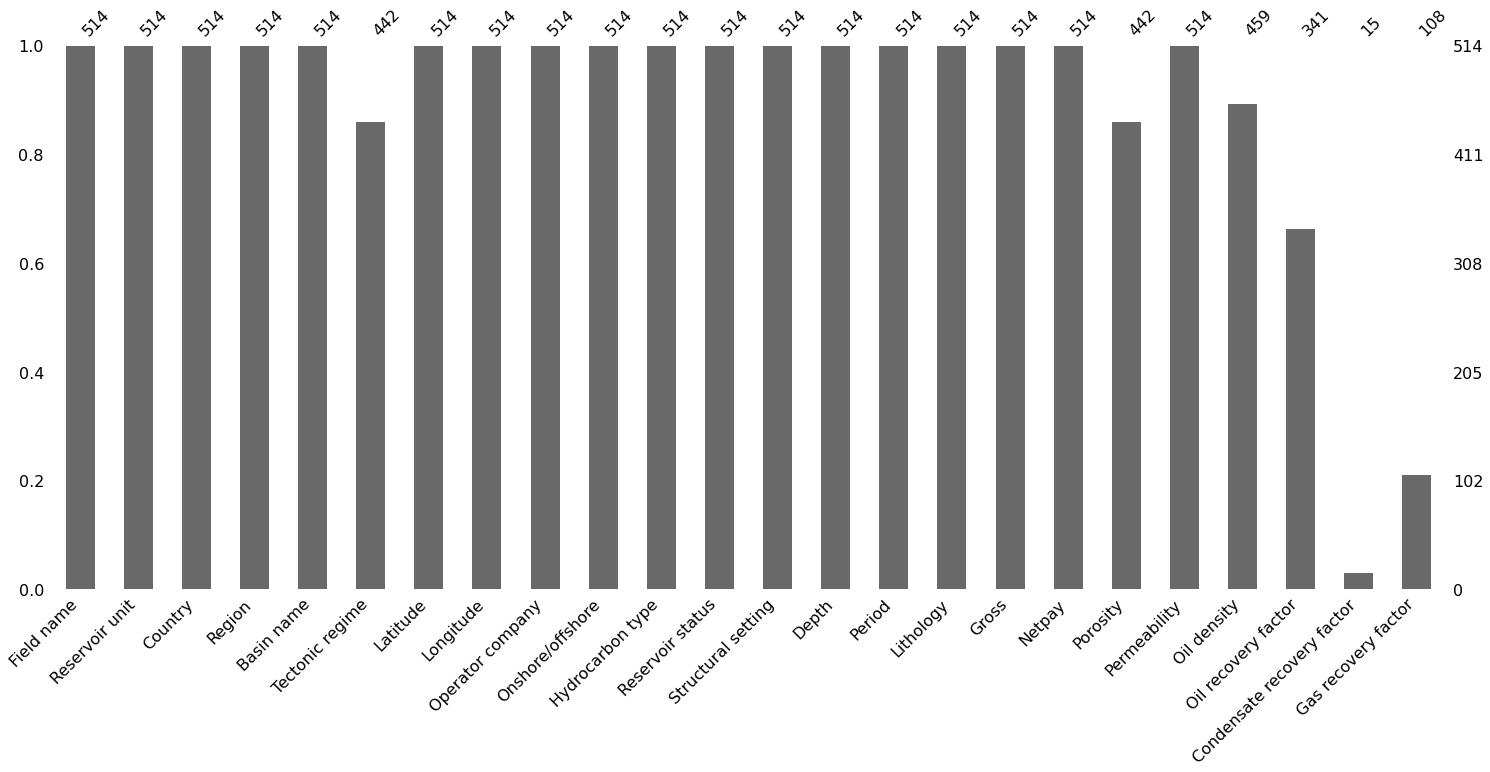

In [6]:
# NaN Analysis
import missingno as msno
msno.bar(hack)

In [7]:
# Leave informative columns 
cols = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
hack = hack[cols]

## Creating / Applying preproccesors

<p> To  apply preproccesor user should provide a pipeline: list, with (Name of Object, Object). 
    <br>Order is important! <br>
    User can pass an empty list in order to drop na. <p>

In [8]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(hack)

In [9]:
discretized_data.sample(5)

Tectonic regime  Period  Lithology  Structural setting  Gross  Netpay  \
243                0      26          6                  10      4       4   
0                  0      12          9                   2      2       3   
170                0       7         11                   2      2       0   
283                2      20         11                   8      4       4   
130                0      21          6                   2      2       3   

     Porosity  Permeability  Depth  
243         0             0      4  
0           3             3      2  
170         1             2      4  
283         2             3      4  
130         0             2      2

In [10]:
discretized_data.isna().sum()

Tectonic regime       0
Period                0
Lithology             0
Structural setting    0
Gross                 0
Netpay                0
Porosity              0
Permeability          0
Depth                 0
dtype: int64

In [11]:
empty_p = pp.Preprocessor([])
empty_p_data, est_e = empty_p.apply(hack)

In [12]:
empty_p_data

Tectonic regime         Period                Lithology  \
0       COMPRESSION       JURASSIC                LIMESTONE   
1         EXTENSION     CRETACEOUS                SANDSTONE   
2       STRIKE-SLIP        NEOGENE  THINLY-BEDDED SANDSTONE   
3       STRIKE-SLIP        NEOGENE                SANDSTONE   
4       COMPRESSION     CRETACEOUS                LIMESTONE   
..              ...            ...                      ...   
437       EXTENSION      PALEOGENE                SANDSTONE   
438       EXTENSION      PALEOGENE                SANDSTONE   
439       EXTENSION       MESOZOIC                VOLCANICS   
440     COMPRESSION  CARBONIFEROUS                SANDSTONE   
441     COMPRESSION  CARBONIFEROUS                SANDSTONE   

    Structural setting  Gross  Netpay  Porosity  Permeability   Depth  
0             FORELAND   75.0    55.2      21.0         410.0  1815.0  
1                 RIFT  223.5    43.2      10.0           8.0  3084.6  
2               WRENCH   34.5    19.8      22.0         200.0  2952.9  
3               WRENCH  152.7   123.0      20.0         300.0  3149.7  
4                 SALT   75.0    30.0      21.0          60.0  1486.5  
..                 ...    ...     ...       ...           ...     ...  
437               RIFT   69.0    20.7      26.7        1872.0  1615.2  
438               RIFT   49.2    18.6      23.2         121.0  1416.3  
439               RIFT  147.6    58.2      12.7           3.6  2952.9  
440           FORELAND   78.6     9.9      24.0          30.0   561.0  
441           FORELAND   38.4    13.2      26.0        1000.0   967.5  

[442 rows x 9 columns]

In [13]:
discretized_data.isna().sum(), est_e

(Tectonic regime       0
 Period                0
 Lithology             0
 Structural setting    0
 Gross                 0
 Netpay                0
 Porosity              0
 Permeability          0
 Depth                 0
 dtype: int64,
 None)